# Введение 

Данная работа состоит из 6 частей:
1. Вызов библиотек
2. Описание теории
3. Реализация алгоритма и разбор примера из методички
4. Отрисовка графиков
5. Применение на ещё одном примере
6. Вывод

Понимаю, что некоторые пункты совсем необязательны, но так работа будет выглядеть нагляднее и целостнее.

Приятного просмотра :)

# 1. Вызов необходимых библиотек 

In [1]:
import numpy as np
import math
from sympy import *
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
%matplotlib inline

# 2.  Немного о теории и области применимости метода Ньютона
## 2.1. Теория

Важно отметить, что метод Ньютона является методом второго порядка.

Для работы необходимо задать начальную точку(точку приближения) $x_0$, затем метод генерирует последовательность точек $x_k$, где $k=0,1,\dots,n-1$, a $n$ - количество точек в этой последовательности.

В очередной точке строится линейная аппроксимация функции (касательная к графику ${f'(x)}$). Точка, в которой аппроксимирующая функция обращается в нуль, используется в качестве следующего приближения $\mathcal{x}_{k+1}$.

Так как уравнение касательной к графику имеет вид $ y = {f'(x_k)} + {f''(x_k)}(x-x_k) $, то можно выразить точку  $\mathcal{x}_{k+1}$ (из условия, что $y=0$)

Итак, $\mathcal{x}_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)} $

Алгоритм заканчивает работу, когда в первый раз выполняется условие:
$\left \| {f'(x_k)} \right \|_1 < \varepsilon $, где $\varepsilon$ - заданная точность, обычно равна или меньше, чем 0.01

## 2.2. Применимость метода Ньютона 

Существует несколько необходимых условий, когда этот алгоритм может использоваться:

1. Предполагается, что функция ${f(x)}$ дважды дифференцируема (т.к в методе используются производные функции первого и второго порядка.
2. Функция ${f(x)}$ должна быть выпуклой, то есть ${f''(x)} > 0 $

# 3. Разбор примера из методички
## 3.1. Условие задачи

Итак, рассмотрим следующий пример и запрограммируем алгоритм.

<img src="https://imageup.ru/img53/3601459/untitled.jpg" border="0">

## 3.2. Задание стартовых значений 

In [2]:
x0 = 1
eps = 10**(-7)

Также зададим функцию, которой будем передавать функцию ${f(x)}$ и точку $x_k$, а она будет возращать значение в этой точке, то есть ${f(x_k)}$

In [3]:
def ValueInPoint(func,point):
    result = func.subs(x,point)
    return result
    

## 3.3. Реализация алгоритма

Зададим $x$ как символ, а не переменную в коде, сформируем выражение $expression$ и для наглядности выведем производные 1 и 2 порядка этой функции.



In [4]:
x = Symbol('x') 
expression = x*atan(x)-(log(1+x**2))/2
ans1 = diff(expression, x,1) 
print("derivative of the function ", ans1)
ans2 = diff(expression,x,2)
print("derivative of the function ", ans2)



derivative of the function  atan(x)
derivative of the function  1/(x**2 + 1)


Будем итеративно формировать точки

<strong>fd</strong> - переменная первой производной в точке 

<strong>sd</strong> - переменная второй производной в точке

Также будем использовать округление до нескольких знаков после запятой, чтобы не получать очень длинные числа в выводе.

In [5]:
k=0
deriv = ValueInPoint(diff(expression,x,1), x0)
while(abs(deriv) > eps):
    fd = ValueInPoint(diff(expression,x,1), x0)
    fd = round(float(fd),3)
    sd = ValueInPoint(diff(expression,x,2), x0)
    sd = round(float(sd),3)
    x0 = x0 - fd/sd
    x0 = round(x0,3)
    deriv = ValueInPoint(diff(expression,x,1),x0)
    deriv = round(float(deriv),7)
    k+=1
print('Точка минимума:', x0)
print('Значение функции в точке:', ValueInPoint(expression,x0))
print('Количество итераций:',k)
   

Точка минимума: 0.0
Значение функции в точке: 0
Количество итераций: 4


## 3.4. Создание функции 

Для удобства создадим функцию, в которую будем передавать выражение(функцию), начальную точку и точность

А возращать она будет точку минимума, значение функции в точке и количество итераций 

In [6]:
def Newton(expression = None, x0 = None, eps = 0.01):
    k=0
    varhistory = []
    deriv = ValueInPoint(diff(expression,x,1), x0)
    varhistory.append(x0)
    while(abs(deriv) > eps):
        fd = ValueInPoint(diff(expression,x,1), x0)
        fd = round(float(fd),3)
        sd = ValueInPoint(diff(expression,x,2), x0)
        sd = round(float(sd),3)
        x0 = x0 - fd/sd
        x0 = round(x0,3)
        varhistory.append(x0)
        deriv = ValueInPoint(diff(expression,x,1),x0)
        deriv = round(float(deriv),7)
        k+=1
    return x0, ValueInPoint(expression, x0), k,varhistory
    
    

Воспользуемся функцией

In [7]:
min_,value,iter_,vr1 = Newton(expression = expression,x0=1,eps=10**(-7))
print('Точка минимума:', min_)
print('Значение функции в точке:', value)
print('Количество итераций:',iter_)
   

Точка минимума: 0.0
Значение функции в точке: 0
Количество итераций: 4


# 4.Отрисовка графиков

Для красоты и наглядности нарисуем несколько графиков:

1. График движнения нашей точки по итерациям
2. График зависимости значения функции от номера итерации

Для этого реализуем соответствующие функции

P.S. Так как в Python нет возможности рисовать линии уровня по одной переменной, пришлось немножко схитрить

In [8]:
def func(x):
    return x*atan(x)-(log(1+x**2))/2

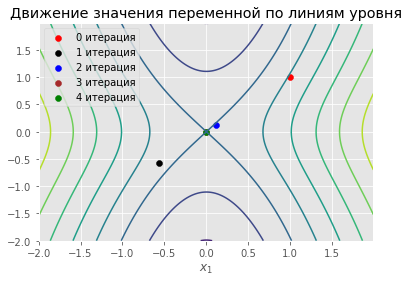

In [9]:
def _show(k,number,varhistory):
    x = np.arange(-2, 2, 0.01)
    y = np.arange(-2, 2, 0.01)
    xgrid, ygrid = np.meshgrid(x, y)
    if number==1:
        zgrid  = (xgrid*np.arctan(xgrid)-np.log(ygrid**2+1)/2)
    if number==2:
        zgrid = (xgrid**2+np.exp(-ygrid))
    
    plt.title('Движение значения переменной по линиям уровня')
    plt.contour(xgrid,ygrid,zgrid)
    plt.xlabel('$x_1$')
    if k == 4:
        for i, color in enumerate(['red', 'black', 'blue', 'brown', 'green'], start=0):
            plt.scatter(varhistory[i],varhistory[i], color=color,label = '{i} итерация'.format(i=i))
    if k == 2:
        for i, color in enumerate(['red', 'black', 'blue'], start=0):
            plt.scatter(varhistory[i],varhistory[i], color=color,label = '{i} итерация'.format(i=i))
    plt.legend(loc='best')

_show(iter_,1,vr1)

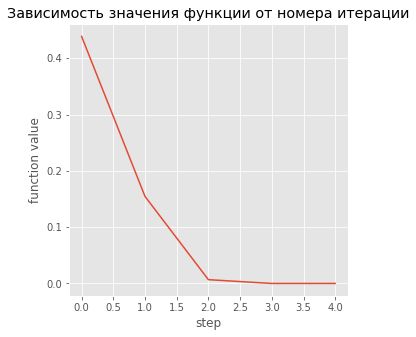

In [10]:
def _value(f,varhistory):
    fn_history = [f(x) for x in varhistory]
    plt.figure(figsize=(5,5))
    plt.title('Зависимость значения функции от номера итерации')
    plt.plot(fn_history);
    plt.xlabel('step')
    plt.ylabel('function value')
_value(func,vr1)

# 5. Решение задачи

Пропустим наш алгоритм через ещё одну надачу, например, из методички возьмем номер 4

Условие задачи:

${f(x)} = x^2+e^{-x}$ $\rightarrow $ min,  $x_0$ = 1

In [11]:
def func2(x):
    return x**2+exp(-x)

In [12]:
expression1 = x**2+exp(-x)
xstart = 1


Посмотрим на вторую производную нашей функции и убедимся в том, что мы можем использовать метод Ньютона.

Действительно, вторая производная всегда больше 0

In [13]:
ans2 = diff(expression1,x,2)
print("derivative of the function ", ans2)

derivative of the function  2 + exp(-x)


Решим задачу, воспользовавшись функцией

In [14]:
min_,value,iter_,vr2 = Newton(expression = expression1,x0=xstart,eps=10**(-3))
print('Точка минимума:', min_)
print('Значение функции в точке:', value)
print('Количество итераций:',iter_)

Точка минимума: 0.352
Значение функции в точке: 0.827184121976341
Количество итераций: 2


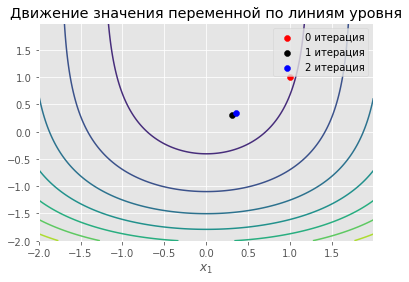

In [15]:
_show(iter_,2,vr2)

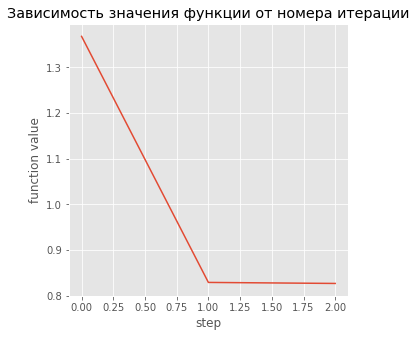

In [16]:
_value(func2,vr2)

Заметим, что если выбрать для данного примера стартовое значение, как предлагалось в методичке, $x_0 = 0.3517$, то алгоритм расходится.

# 6. Вывод 

Выскажу личные впечатления: метод Ньютона - неплохой простенький метод, годный для решения простых оптимизационных задач, например, которые мы рассмотрели.

Однако, он очень чувствителен к выбору начальной точки. Этим "грешат" очень многие методы оптимизации, но этот слишком чувствителен к небольшим отклонениям в стартовых значениях.

Также он годен для одномерной оптимизации, знаю, что есть его модификации для многомерных случаев(например, Ньютон-Рафсон), но они не такие уж эффективные и мне не зашли.

P.S. Я фанат продвинутых градиентных методов, таких как $Adam, SGD$ $(c$ $Nesterov$ $Momentum)$, $RMSProp$